# Boston and Seattle Airbnb

## CRISP-DM Process ##
**Business Understanding**: From the datasets we can get a better knowledge how we can set the rental price for peroperties and figure out some interesting differences between Boston and Seattle Airbnb. Three business aspect questions were asked before diving into the dataset:

1. Is there any noticeable difference between Seattle and Boston Airbnb?
2. What is the average price/night per month?
3. What are the most important features to estimate Airbnb rental price?

**Data Understanding**：Boston dataset consists of 6036 listings while Seattle's has 8494 listings. Datasets were investigated before any preprocessing.

**Prepare Data**: Including data cleaning, filling NAN value, one-hot encoding and MinMax preprocessing. Please refer to Preprocessing for detail.

**Data Modeling**: Used GridSearch with 5 folds validation to find best parameter for GradientBoostingRegressor. Some other models are trained and compared as well beforehand. Please refer to Training for detail.

**Evaluate the Results**: Result and discussion are published in https://medium.com/@mukhtar.rad/exploring-boston-and-seattle-airbnb-datasets-f0d6494f097.

## 1. Import & Loading Datasets ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.model_selection import GridSearchCV

listings_Boston = pd.read_csv("listings_Boston.csv")
calendar_boston = pd.read_csv("calendar_boston.csv")
listings_Seattle = pd.read_csv("listings_Seattle.csv")
calendar_seattle = pd.read_csv("calendar_seattle.csv")

C:\Users\AI\AppData\Local\Continuum\anaconda3\envs\dlnd\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploring The dataset

In [2]:
listings_Boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20180817025537,2018-08-17,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,NaN,NaN,f,f,super_strict_30,f,f,2,0.37
1,5506,https://www.airbnb.com/rooms/5506,20180817025537,2018-08-17,**$125 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,6,0.59
2,6695,https://www.airbnb.com/rooms/6695,20180817025537,2018-08-17,$125 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,6,0.65
3,6976,https://www.airbnb.com/rooms/6976,20180817025537,2018-08-17,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,f,moderate,t,f,1,0.62
4,8789,https://www.airbnb.com/rooms/8789,20180817025537,2018-08-17,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,10,0.33


In [3]:
calendar_boston.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
listings_Seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20180816121209,2018-08-16,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,NaN,...,f,NaN,{WASHINGTON},t,f,strict_14_with_grace_period,f,f,2,0.16
1,4291,https://www.airbnb.com/rooms/4291,20180816121209,2018-08-16,Sunrise in Seattle Master Suite,This property is located in the lovely Maple L...,"Located in Seattle, this is a spacious, clean ...",This property is located in the lovely Maple L...,none,NaN,...,f,NaN,{WASHINGTON},f,f,moderate,f,f,5,0.91
2,5682,https://www.airbnb.com/rooms/5682,20180816121209,2018-08-16,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,NaN,{WASHINGTON},f,f,strict_14_with_grace_period,f,t,1,4.38
3,6606,https://www.airbnb.com/rooms/6606,20180816121209,2018-08-16,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,"A peaceful yet highly accessible neighborhood,...",...,f,NaN,{WASHINGTON},f,f,strict_14_with_grace_period,f,f,3,1.12
4,9419,https://www.airbnb.com/rooms/9419,20180816121209,2018-08-16,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,NaN,{WASHINGTON},f,f,moderate,t,t,5,1.29


In [5]:
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
# Plot the Ratio of missing data for all Column
null_Boston = listings_Boston.isnull().sum()
null_perB = null_Boston / len(listings_Boston) * 100

print(null_perB[null_perB>50])

print("Seattle Missing")
null_Seattle = listings_Seattle.isnull().sum()
null_perS = null_Seattle / len(listings_Seattle) * 100
print(null_perS[null_perS>50])

thumbnail_url                   100.000000
medium_url                      100.000000
xl_picture_url                  100.000000
host_acceptance_rate            100.000000
neighbourhood_group_cleansed    100.000000
square_feet                      98.972830
weekly_price                     89.744864
monthly_price                    90.076209
license                         100.000000
jurisdiction_names               99.966865
dtype: float64
Seattle Missing
thumbnail_url           100.000000
medium_url              100.000000
xl_picture_url          100.000000
host_acceptance_rate    100.000000
square_feet              96.067813
weekly_price             84.871674
monthly_price            88.156346
license                  99.952908
dtype: float64


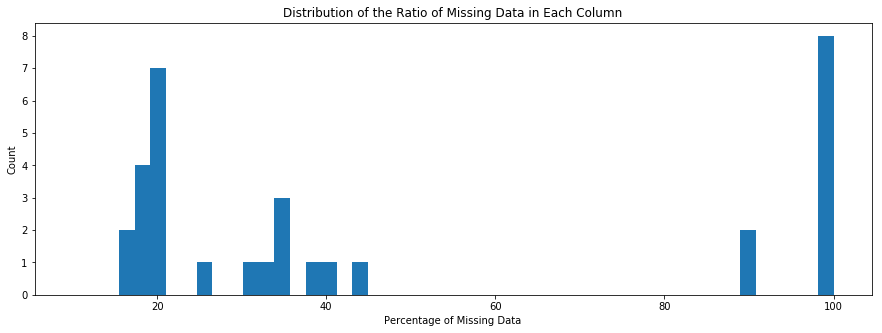

In [7]:
plt.figure(figsize=(15,5))
plt.title('Distribution of the Ratio of Missing Data in Each Column')
plt.hist(null_perB, bins = np.linspace(10,100,50))
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Count')
plt.show()

In [8]:
# Preprocess 'Boston price' columns into numerical value
if type(listings_Boston.price[0]) == str:
    x = listings_Boston.price.apply(lambda x: float(x[1:].replace(',', '')))
print(x.describe())
x[x<500].value_counts().head(10)
print('percentage of price lessthan 600$',x[x<600].value_counts().sum()*100/x.value_counts().sum())
print('percentage of price morethan 600$',x[x>600].value_counts().sum()*100/x.value_counts().sum())

count    6036.000000
mean      184.089629
std       184.401721
min         0.000000
25%        80.000000
50%       140.000000
75%       219.000000
max      3999.000000
Name: price, dtype: float64
percentage of price lessthan 600$ 96.04042412193506
percentage of price morethan 600$ 3.6779324055666005


In [9]:
# Preprocess 'Seattle price' columns into numerical value
if type(listings_Seattle.price[0]) == str:
    y = listings_Seattle.price.apply(lambda x: float(x[1:].replace(',', '')))
print(y.describe())
y[y<500].value_counts().head(10)
print('percentage of price lessthan 600$',y[y<600].value_counts().sum()*100/y.value_counts().sum())
print('percentage of price morethan 600$',y[y>600].value_counts().sum()*100/y.value_counts().sum())

count    8494.000000
mean      152.532494
std       137.133373
min         0.000000
25%        80.000000
50%       119.000000
75%       189.000000
max      5400.000000
Name: price, dtype: float64
percentage of price lessthan 600$ 98.98752060277843
percentage of price morethan 600$ 0.8829762185071816


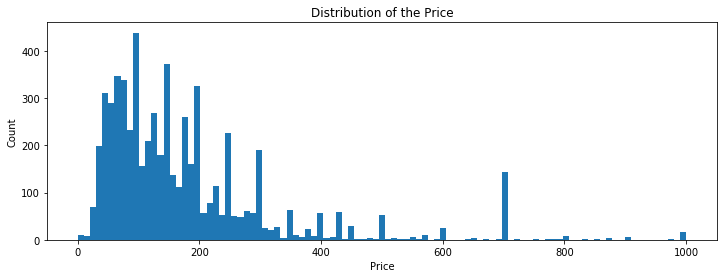

In [10]:
plt.figure(figsize=(12,4))
plt.title('Distribution of the Price')
plt.hist(x,bins = np.linspace(0,1000,100))
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [11]:
# Monthly average price per night in Seattle
listings_Seattle['Date'] = pd.to_datetime(calendar_seattle['date'], errors='coerce')
listings_Seattle['Avg_price'] = listings_Seattle.price.apply(lambda x: float(x[1:].replace(',', '')))
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_price_per_night_Seattle = listings_Seattle.groupby(listings_Seattle['Date'].dt.strftime('%m'))['Avg_price'].mean()
avg_price_per_night_Seattle = pd.DataFrame(avg_price_per_night_Seattle).reset_index()
avg_price_per_night_Seattle['Date'] = avg_price_per_night_Seattle.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
avg_price_per_night_Seattle.head(12)

,Date,Avg_price
0,Jan,147.087744
1,Feb,147.827586
2,Mar,148.888441
3,Apr,151.309558
4,May,154.148668
5,Jun,161.181159
6,Jul,153.647966
7,Aug,150.914446
8,Sep,153.384058
9,Oct,152.182328


In [12]:
# Monthly average price per night in Boston
listings_Boston['Date'] = pd.to_datetime(calendar_boston['date'], errors='coerce')
listings_Boston['Avg_price'] = listings_Boston.price.apply(lambda x: float(x[1:].replace(',', '')))
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_price_per_night_Boston = listings_Boston.groupby(listings_Boston['Date'].dt.strftime('%m'))['Avg_price'].mean()
avg_price_per_night_Boston = pd.DataFrame(avg_price_per_night_Boston).reset_index()
avg_price_per_night_Boston['Date'] = avg_price_per_night_Boston.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
avg_price_per_night_Boston.head(12)


,Date,Avg_price
0,Jan,170.618952
1,Feb,191.263158
2,Mar,222.525617
3,Apr,180.807843
4,May,212.244782
5,Jun,181.237255
6,Jul,177.751423
7,Aug,187.119772
8,Sep,163.901031
9,Oct,175.645161


## Cleaning Function

In [2]:
def cleaning(listings,calendar):
    '''
    input:
        listings: The listings dataset of target city.
    output:
        df2: The preprocessed (Cleaning, Filling Missing data, One-hot encoding, MinMax transform) listings.
        price_raw: Split from original listings and serve as target in training process.
        possible_amenities: Return all amenities listed by Airbnb host in certain city.
    '''

    # Plot the Ratio of missing data for all Column
    null_list = listings.isnull().sum()
    null_per = null_list / len(listings) * 100
    
    plt.figure(figsize=(15,5))
    plt.title('Distribution of the Ratio of Missing Data in Each Column')
    plt.hist(null_per, bins = np.linspace(10,100,50))
    plt.xlabel('Percentage of Missing Data')
    plt.ylabel('Count')
    plt.show()
    
    
    # Drop part of the columns with high ratio of missing data
    drop_index = null_per[null_per > 50].index
    listings.drop(drop_index, axis = 1, inplace = True)
    
    # Preprocess 'price' columns into numerical value
    if type(listings.price[0]) == str:
        listings.price = listings.price.apply(lambda x: float(x[1:].replace(',', '')))
    print(listings.price.describe())
    # Plot the distribution of price in Certain City
    plt.figure(figsize=(12,4))
    plt.title('Distribution of the Price')
    plt.hist(listings.price,bins = np.linspace(0,1000,100))
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()
    
    # Drop large price rows 
    drop_price_index = listings[listings.price > 500].index
    listings.drop(drop_price_index, axis = 0, inplace = True)
    # Drop useless features columns 
    
    listings.drop(['space', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 
               'experiences_offered', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_about', 'host_neighbourhood',
              'host_picture_url', 'host_location', 'street', 'city', 'state', 'smart_location', 'country_code', 'country', 'first_review', 'last_review', 'id', 'host_verifications', 
               'host_id', 'neighbourhood', 'calendar_last_scraped', 'market','zipcode'], axis = 1, inplace = True)
    
    # Preprocess the 'host_since' column
    now = datetime.strptime('2019-08-24','%Y-%m-%d')
    listings.host_since = listings.host_since.apply(lambda x: (now - datetime.strptime(x, '%Y-%m-%d')).days)
    
    # Monthly average price per night in Seattle
    listings['Date'] = pd.to_datetime(calendar['date'], errors='coerce')
    #listings['Avg_price'] = listings.price.apply(lambda x: float(x[1:].replace(',', '')))
    month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    avg_price_per_night = listings.groupby(listings['Date'].dt.strftime('%m'))['price'].mean()
    avg_price_per_night = pd.DataFrame(avg_price_per_night).reset_index()
    avg_price_per_night['Date'] = avg_price_per_night.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
    avg_price_per_night.head(12)
    
    # Preprocess some other columns, convert into numerical value
    
    df = listings
    df['cleaning_fee'] = df['cleaning_fee'].replace( '[$,]','', regex=True ).astype(float)
    df['extra_people'] = df['extra_people'].replace( '[$,]','', regex=True ).astype(float)
    df['security_deposit'] = df['security_deposit'].replace( '[$,]','', regex=True ).astype(float)
    df['host_response_rate'] = df['host_response_rate'].replace( '%','', regex=True ).astype(float)
    
    
    # Fill missing data
    df.bathrooms.fillna(df.groupby("bedrooms")["bathrooms"].transform("median"), inplace=True)
    df.beds.fillna(df.groupby("bedrooms")["beds"].transform("median"), inplace=True)
    df.bedrooms.fillna(df.groupby("bathrooms")["bedrooms"].transform("median"), inplace=True)
    df.security_deposit.fillna(0, inplace = True)
    df.cleaning_fee.fillna(0, inplace = True)
    fillmean_list = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                     'review_scores_location', 'review_scores_value', 'reviews_per_month']
    for col in fillmean_list:
        df[col].fillna(df[col].mean(), inplace = True)
    df['host_response_rate'].fillna(df.host_response_rate.mean(), inplace = True)   
    
    # One-hot encoding the whole dataframe
    df = pd.get_dummies(df)
    price_raw = df['price']
    df = df.drop('price', axis = 1)
    df = df.drop('Date', axis = 1)
    
    # Use MinMax to process some of the numerical data
    scaler = MinMaxScaler()
    numerical = ['host_since', 'latitude', 'longitude', 'review_scores_rating']
    df[numerical] = scaler.fit_transform(df[numerical])
    return df, price_raw, avg_price_per_night

In [3]:
def training(df, price_raw):
    '''
    input:
        df: The preprocessed (Cleaning, Filling Missing data, One-hot encoding, MinMax transform) listings.
        price_raw: Split from original listings and serve as target in training process.
        possible_amenities: Return all amenities listed by Airbnb host in certain city.
    output:
        None
    '''
    
    
    # Split the preprocessed dataset into train/test dataset
    X_train, X_test, y_train, y_test = train_test_split(df, price_raw, test_size = 0.2, random_state = 0)
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    
    # Grid Search to find Best Parameter
    param_grid = {'n_estimators': [200], 
                  'learning_rate': [0.01],
                  'max_depth': [10],
                  'min_samples_split': [5],
                  'subsample': [0.7]
                 }

    forest_reg = GradientBoostingRegressor(random_state = 42)
    grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    y_pred = grid_search.predict(X_test)
    print("Error Score on Test Data: {}.".format(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))))
    # Plot Featrue Importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    features = sorted(zip(feature_importances, df.columns), reverse=True)
    attribute = []
    coefficient = []
    for feature in features:
        attribute.append(feature[1]) 
        coefficient.append(feature[0])
    plt.figure(figsize=(12,4))
    plt.bar(attribute[:20], height=coefficient[:20])
    plt.xticks(rotation=90)
    plt.xlabel('feature')
    plt.ylabel('feature importance')
    plt.title('feature importance for the Top 20 features')
    plt.show()
    
    

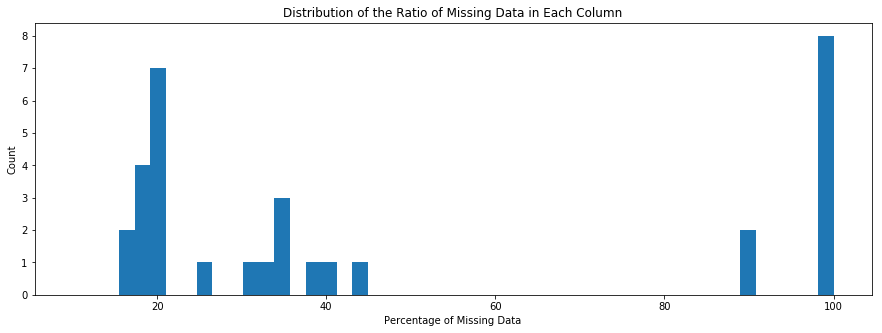

count    6036.000000
mean      184.089629
std       184.401721
min         0.000000
25%        80.000000
50%       140.000000
75%       219.000000
max      3999.000000
Name: price, dtype: float64


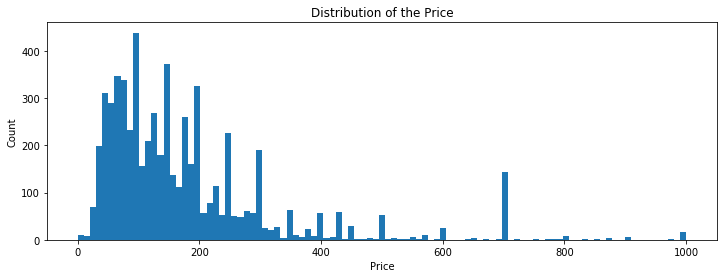

C:\Users\AI\AppData\Local\Continuum\anaconda3\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


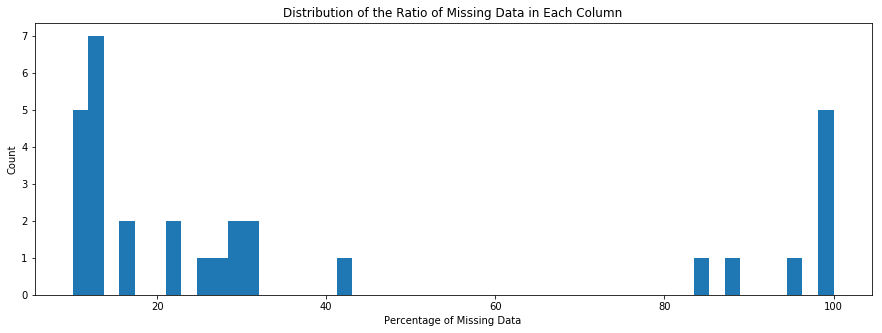

count    8494.000000
mean      152.532494
std       137.133373
min         0.000000
25%        80.000000
50%       119.000000
75%       189.000000
max      5400.000000
Name: price, dtype: float64


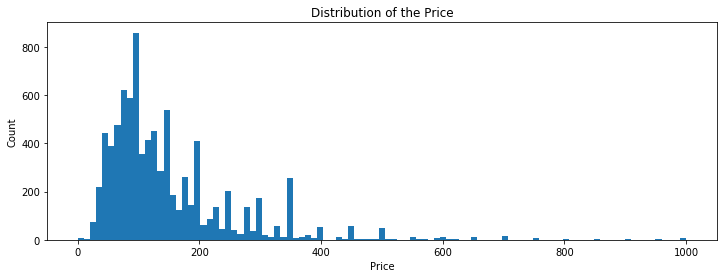

C:\Users\AI\AppData\Local\Continuum\anaconda3\envs\dlnd\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
Boston, price_Boston, avg_price_per_night_Boston = cleaning(listings_Boston,calendar_boston)
Seattle, price_Seattle, avg_price_per_night_Seattle = cleaning(listings_Seattle,calendar_seattle)

In [5]:
avg_price_per_night_Boston

,Date,price
0,Jan,156.635611
1,Feb,161.032483
2,Mar,153.094650
3,Apr,158.977551
4,May,158.760825
5,Jun,150.092402
6,Jul,148.956000
7,Aug,151.348178
8,Sep,148.609342
9,Oct,162.457732


In [6]:
avg_price_per_night_Seattle

,Date,price
0,Jan,136.133992
1,Feb,132.756241
2,Mar,139.881148
3,Apr,145.311239
4,May,144.025678
5,Jun,151.163235
6,Jul,146.219373
7,Aug,146.796610
8,Sep,149.140146
9,Oct,143.776353


Training set has 4611 samples.
Testing set has 1153 samples.
{'learning_rate': 0.01, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
55.47972276700011 {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
Error Score on Test Data: 52.839445850550824.


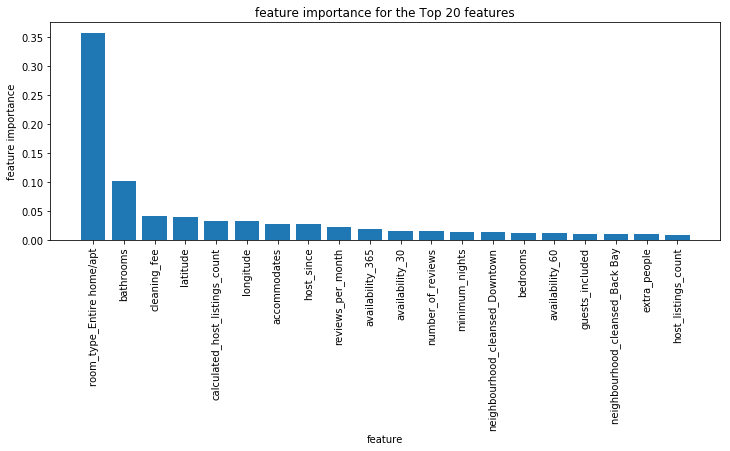

In [7]:
training(Boston, price_Boston)


Training set has 6701 samples.
Testing set has 1676 samples.
{'learning_rate': 0.01, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
52.97285464503111 {'learning_rate': 0.01, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
Error Score on Test Data: 49.600243749822106.


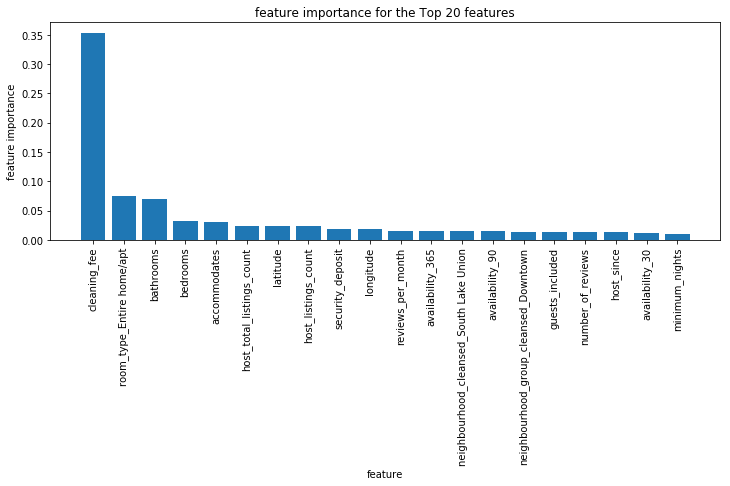

In [8]:
training(Seattle, price_Seattle)

In [12]:
Seattle.isnull().sum()

host_since                                          0
host_response_rate                                  0
host_listings_count                                 0
host_total_listings_count                           0
zipcode                                            26
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
security_deposit                                    0
cleaning_fee                                        0
guests_included                                     0
extra_people                                        0
minimum_nights                                      0
maximum_nights                                      0
availability_30                                     0
availability_60             